In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_color_codes()

In [3]:
import clumpy
from clumpy import datasets

### 10k Diabetes Processing
- Numerics: Center and Scale
- Categoricals: Remove categoricals with < 2 levels, Add a level for missing values, One-Hot Encode

In [ ]:
import clumpy
diabetes = clumpy.datasets.fetch_10kdiabetes().as_raw()
clusterer = clumpy.analysis.cluster(diabetes)

/home/joshua/workspace/scikit-learn/sklearn/utils/extmath.py:368: UserWarning: The number of power iterations is increased to 7 to achieve higher precision.
  warnings.warn("The number of power iterations is increased to "


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.110843
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.430321


In [ ]:
kmeans = clumpy.cluster.auto_kmeans(clusterer.embedding_, n_clusters=[4])
clumpy.plots.plot_clusters(clusterer.embedding_, kmeans.labels_)

In [114]:
clusterer.rules_[0].limits

,min,max,qp values
number_diagnoses,1.0,8.5,0.0
num_procedures,0.0,3.5,0.0
num_lab_procedures,1.0,62.5,0.0
time_in_hospital,1.0,1.5,0.0
num_medications,1.0,13.5,0.0


In [113]:
clusterer.rules_[1].limits

,min,max,qp values
num_medications,18.5,81.0,1.225095e-48
number_diagnoses,7.5,9.0,1.257108e-19
time_in_hospital,4.5,14.0,1.876100e-17
num_lab_procedures,28.5,120.0,2.876519e-04


   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0          4.434700           43.078600        1.399200        15.563800   
0          2.972764           36.895246        0.902498        11.612893   

   number_diagnoses        id  
0          7.025300  marginal  
0          6.339726   cluster  


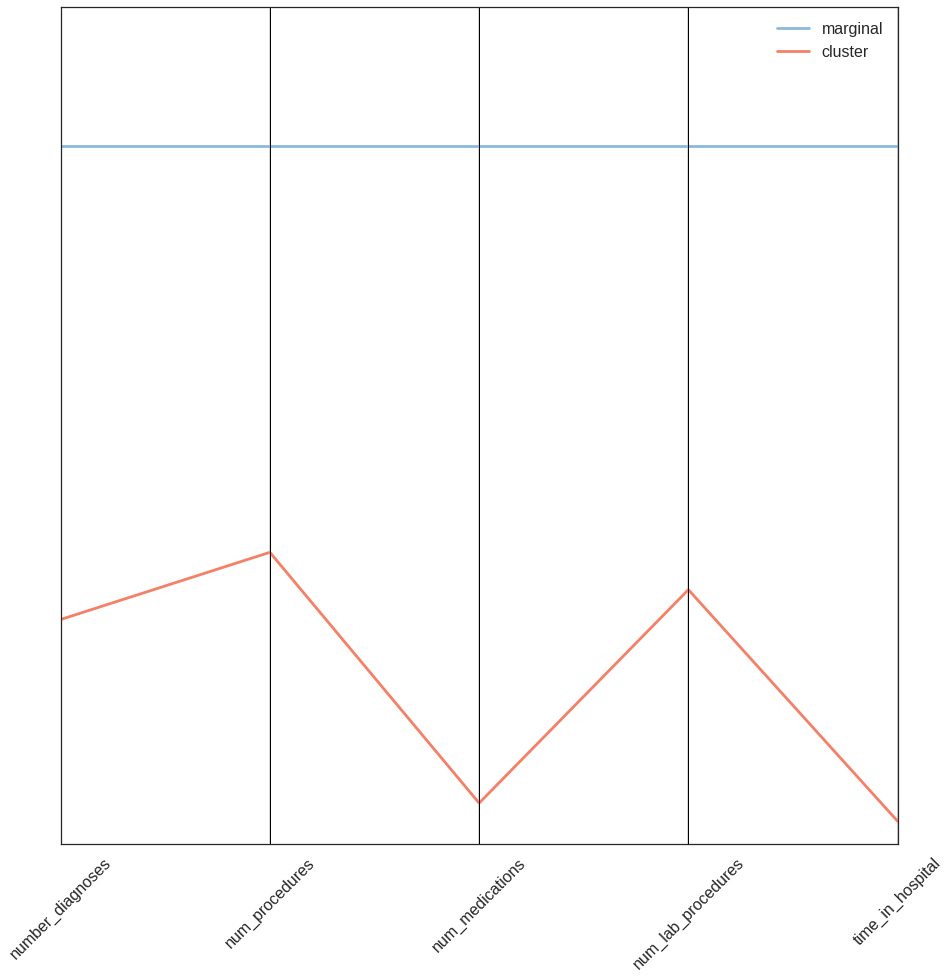

In [110]:
clumpy.analysis.plot(clusterer, diabetes, 0)

In [8]:
from clumpy.datasets import fetch_10kdiabetes
from clumpy.datasets.utils import numeric_columns
diabetes = fetch_10kdiabetes()
data = diabetes.as_raw()
data.pop('readmitted')

num_columns = numeric_columns(data)
categorical_columns = [col for col in data.columns if 
                       col not in num_columns]
feature_names = num_columns + categorical_columns

### PCA + Scaled Numeric

In [17]:
from clumpy.preprocessing import process_data
from sklearn.decomposition import RandomizedPCA
from sklearn.manifold import TSNE

X, num_cols, cat_cols = process_data(data, categorical_columns=categorical_columns,
                 impute='mean', cat_preprocessing='onehot', num_preprocessing='standardize')

# pca on one-hot vectors
pca = RandomizedPCA(n_components=50, random_state=124, iterated_power=7).fit_transform(X[:, len(num_columns):])

X = np.hstack((X[:, :len(num_columns)], pca))
scaled_X = X - np.mean(X, axis=0)
scaled_X /= np.max(scaled_X, axis=0)
scaled_X
#tsne = TSNE(n_components=2, random_state=1234, verbose=True, init='pca')
#embedding = tsne.fit_transform(scaled_X)
#embedding -= np.mean(embedding, axis=0)

/home/joshua/workspace/scikit-learn/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten components_. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


array([[-0.35907917, -0.10502409,  0.56529299, ...,  0.0175151 ,
         0.01313631,  0.05929169],
       [-0.25453462, -0.45603174,  0.7826465 , ...,  0.08007108,
        -0.00091255, -0.11509268],
       [ 0.26818814, -0.40403061, -0.30412102, ..., -0.1300456 ,
        -0.02781727, -0.18802612],
       ..., 
       [ 0.89545545,  0.03797903,  0.13058599, ...,  0.0238098 ,
         0.11360666, -0.09321078],
       [-0.25453462,  0.24598356, -0.08676752, ...,  0.03997871,
         0.13922643, -0.14722971],
       [ 0.37273269,  0.23298328, -0.30412102, ..., -0.40680363,
        -0.3883513 , -0.24963658]])

### Dissimilarity measure

In [109]:
from clumpy.preprocessing import process_data
from sklearn.manifold import TSNE

X = process_data(data, categorical_columns=categorical_columns, impute='mean')
#indices = np.arange(X.shape[1])
#dist_func = clumpy.metrics.GowerDistance(
#    numeric_indices=indices[:len(num_columns)], categorical_indices=indices[len(num_columns):], n_jobs=-1, gamma='heuristic')
#dis = dist_func(X)

#tsne = TSNE(n_components=2, random_state=1234, verbose=True, init='random', metric='precomputed')
#embedding = tsne.fit_transform(dis)
#embedding -= np.mean(embedding, axis=0)


array([[   1.,   35.,    4., ...,  344.,  430.,  203.],
       [   2.,    8.,    5., ...,   45.,  184.,  437.],
       [   7.,   12.,    0., ...,  455.,    1.,  136.],
       ..., 
       [  13.,   46.,    2., ...,  344.,    1.,    1.],
       [   2.,   62.,    1., ...,    1.,  207.,  461.],
       [   8.,   61.,    0., ...,  138.,  371.,  404.]])

### Cluster using HDBSCAN

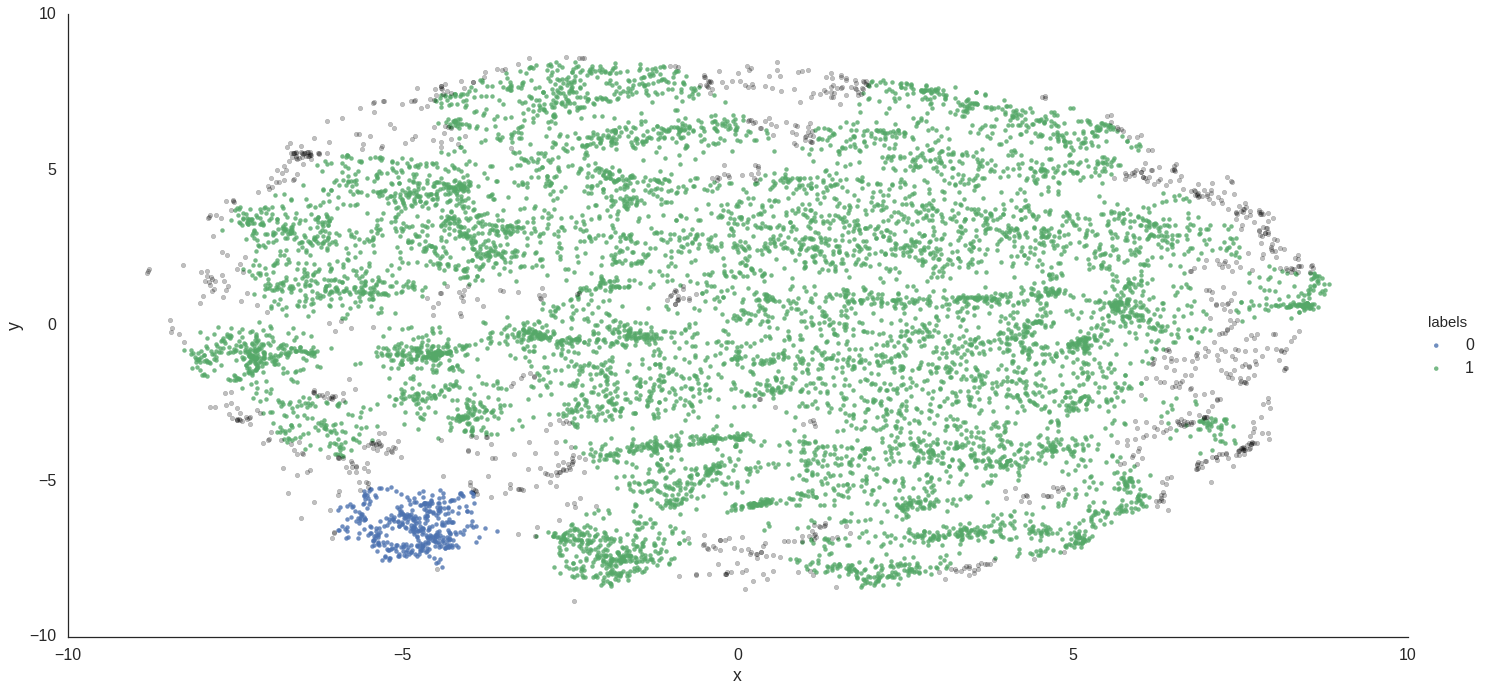

In [103]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=int(embedding.shape[0] * .01)).fit(embedding)
clumpy.plots.plot_clusters(embedding, clusterer.labels_)

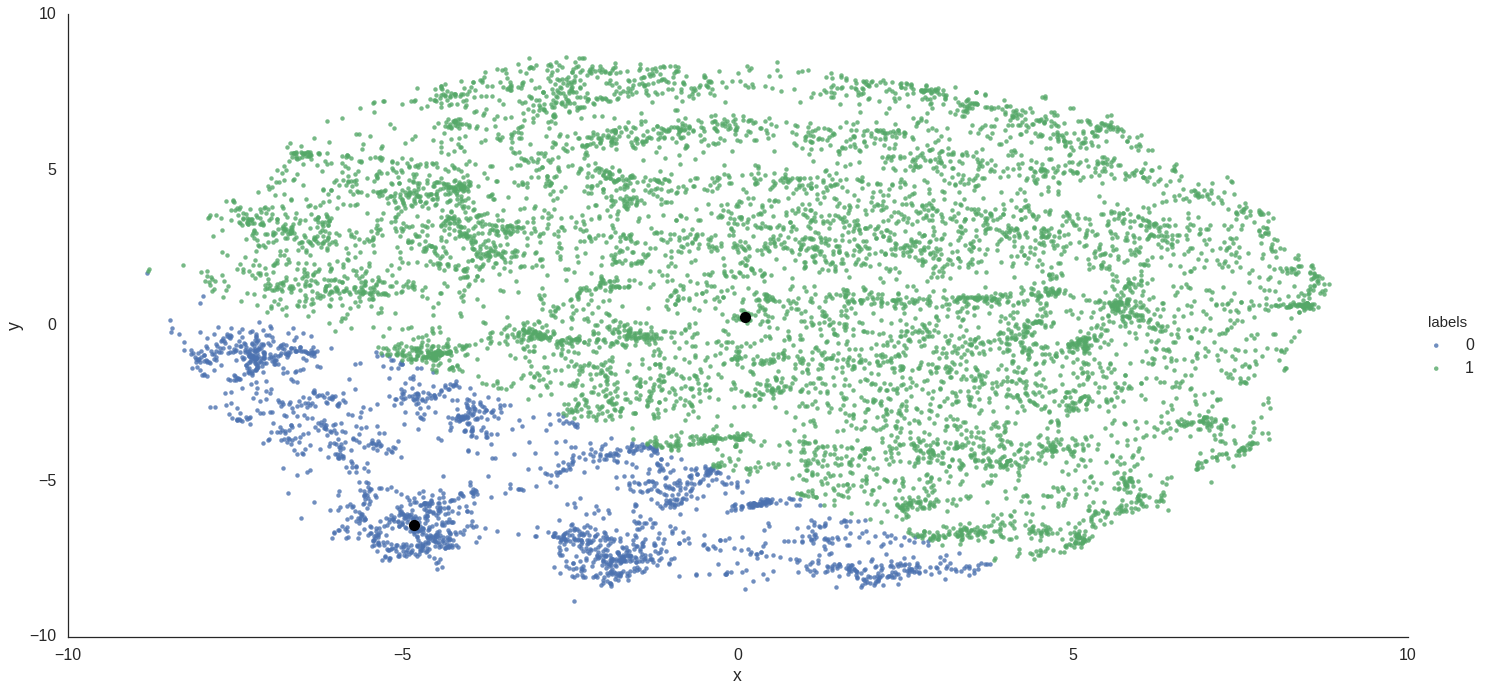

In [104]:
from clumpy.base import convert_to_kmeans

kmeans = convert_to_kmeans(embedding, clusterer)
clumpy.plots.plot_clusters(embedding, kmeans.labels_, kmeans.cluster_centers_)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_jobs=4).fit(scaled_X)

### Feature Importance

In [23]:
from clumpy import importance
X, num_cols, cat_cols = process_data(data, categorical_columns=categorical_columns)
feature_names = num_cols + cat_cols

importances = importance.anova_importance(X, kmeans.labels_, feature_names=feature_names, n_features=5)

/home/joshua/.virtualenvs/plot/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/home/joshua/.virtualenvs/plot/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]
/home/joshua/workspace/scikit-learn/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [27 35 37 38 42 43 44] are constant.
  UserWarning)


### Text Descriptions

In [25]:
from clumpy.rules import tree_descriptions
rules = tree_descriptions(
    data, 
    kmeans.labels_, 
    categorical_columns=categorical_columns,
    feature_names=importances,
    max_depth=5)

pd.DataFrame({'cluster_id': range(len(rules)), 'description': rules})
for cluster_id, rule in enumerate(rules):
    print('cluster_id: {}'.format(cluster_id))
    print
    print(rule)
    print

cluster_id: 0

gender != Female AND
number_diagnoses > 7.5 

cluster_id: 1

gender != Male AND
number_diagnoses > 7.5 

cluster_id: 2

4.5 < number_diagnoses <= 5.5 

cluster_id: 3

5.5 < number_diagnoses <= 6.5 



In [43]:
importances

{0: ['time_in_hospital',
  'num_lab_procedures',
  'num_medications',
  'number_diagnoses',
  'gender'],
 1: ['time_in_hospital',
  'num_medications',
  'number_diagnoses',
  'gender',
  'age'],
 2: ['time_in_hospital',
  'num_medications',
  'number_diagnoses',
  'age',
  'admission_source_id'],
 3: ['time_in_hospital',
  'num_medications',
  'number_diagnoses',
  'change',
  'diabetesMed']}

In [46]:
from clumpy.rules import prim_descriptions

boxes = prim_descriptions(data, kmeans.labels_, feature_names=importances)

In [50]:
for box in boxes:
    print(box.limits)

                     min     max  qp values
gender            {Male}  {Male}        0.0
number_diagnoses     7.5       9        0.0
                       min       max  qp values
gender            {Female}  {Female}        0.0
number_diagnoses       7.5         9        0.0
                  min  max  qp values
number_diagnoses  1.0  4.5        0.0
                   min   max      qp values
number_diagnoses   4.5   7.5   0.000000e+00
diabetesMed       {No}  {No}  1.038991e-187


### Visualization

   number_diagnoses        id
0           7.02530  marginal
0           8.50506   cluster


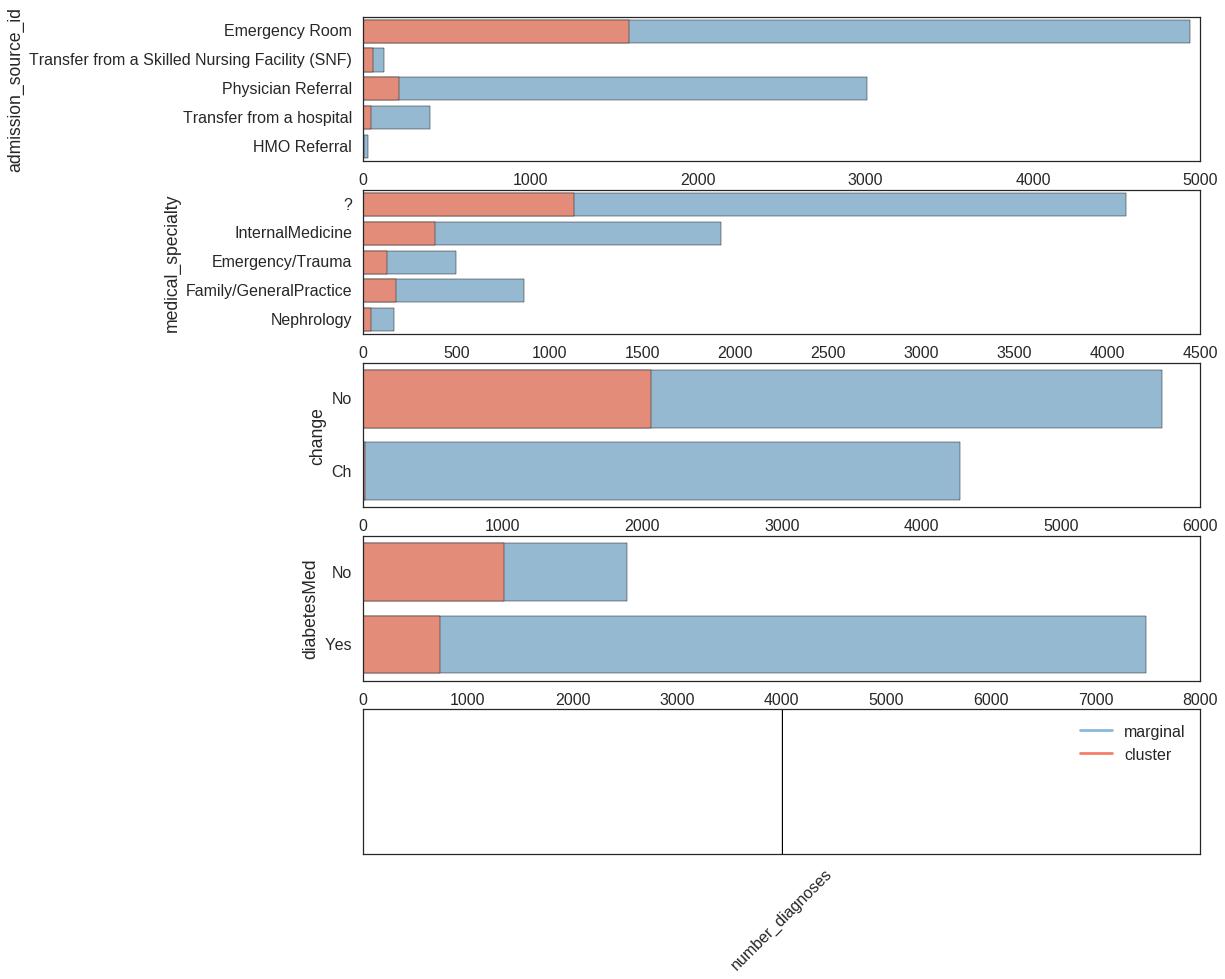

In [203]:
from clumpy.plots import plot_cluster_statistics

cluster_id = 0
cluster_importances = importances[cluster_id]
cat_vars = [var for var in cluster_importances if var in cat_cols]
num_vars = [var for var in cluster_importances if var in num_cols]

plot_cluster_statistics(
    cluster_labels=kmeans.labels_, 
    cluster_id=cluster_id, 
    data=data, scale=True,
    quant_var=num_vars,
    qual_var=cat_vars,
    figsize=(15,15))

In [9]:
import mca
X, num_cols, cat_cols = clumpy.preprocessing.process_data(data, categorical_columns=categorical_columns,
                 impute='mean', cat_preprocessing='onehot', num_preprocessing='standardize')

In [10]:
cat_X = X[:, len(num_cols):]

In [14]:
df = pd.DataFrame(cat_X, columns=cat_cols)
pd.isnull(df.values).sum()

0

In [12]:
mca = mca.mca(df, ncols=df.shape[1])

ValueError: array must not contain infs or NaNs